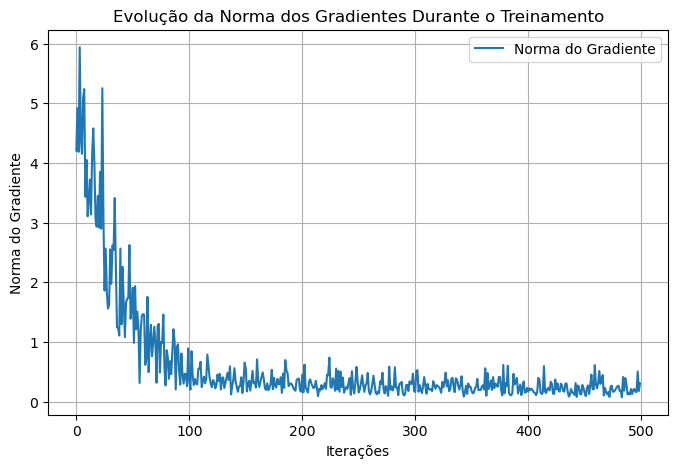

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Modelo simples de regressão linear
model = nn.Linear(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Dados de treinamento (dummy)
X = torch.linspace(0, 1, 100).view(-1, 1)
y = 2 * X + 0.3 + 0.1 * torch.randn_like(X)

# Configuração do dataloader (mini-batches)
dataset = torch.utils.data.TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

# Treinamento e coleta da norma dos gradientes
num_epochs = 50
grad_history = []

for epoch in range(num_epochs):
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        
        # Calculando a norma total dos gradientes
        total_grad = 0.0
        for param in model.parameters():
            if param.grad is not None:
                total_grad += param.grad.data.norm(2).item()
        grad_history.append(total_grad)
        
        optimizer.step()

# Visualização
plt.figure(figsize=(8, 5))
plt.plot(grad_history, label='Norma do Gradiente')
plt.xlabel('Iterações')
plt.ylabel('Norma do Gradiente')
plt.title('Evolução da Norma dos Gradientes Durante o Treinamento')
plt.legend()
plt.grid()
plt.show()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:13<00:00, 755kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 268kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.15MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

SGD - Epoch 1/5: Loss = 0.6630
SGD - Epoch 2/5: Loss = 0.3820
SGD - Epoch 3/5: Loss = 0.3617
SGD - Epoch 4/5: Loss = 0.3476
SGD - Epoch 5/5: Loss = 0.3389
Momentum - Epoch 1/5: Loss = 2.0364
Momentum - Epoch 2/5: Loss = 1.3084
Momentum - Epoch 3/5: Loss = 1.3370
Momentum - Epoch 4/5: Loss = 1.2067
Momentum - Epoch 5/5: Loss = 1.2179
Nesterov - Epoch 1/5: Loss = 1.5597
Nesterov - Epoch 2/5: Loss = 0.7491
Nesterov - Epoch 3/5: Loss = 0.7237
Nesterov - Epoch 4/5: Loss = 0.7376
Nesterov - Epoch 5/5: Loss = 0.7302


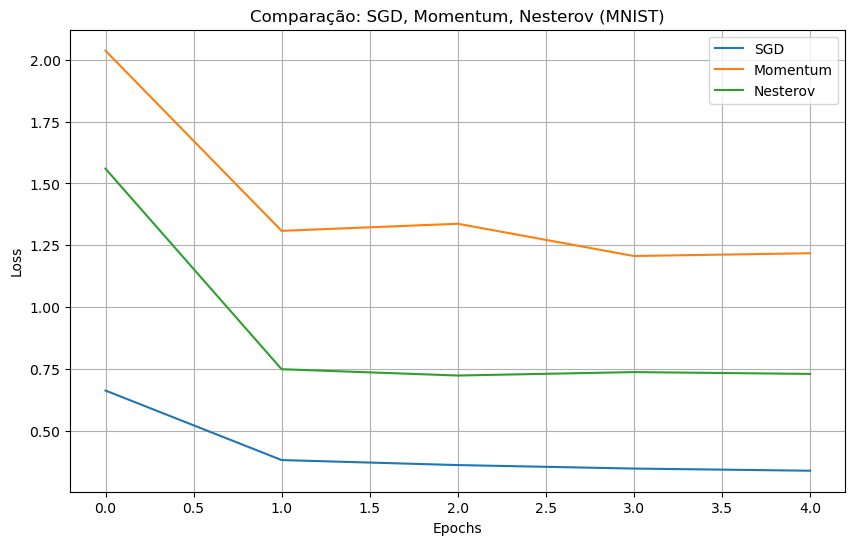

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Configuração do dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalização
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Modelo simples
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)  # 28x28 pixels para 10 classes

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        return self.fc(x)

# Configuração dos otimizadores
lr = 0.1
optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=lr),
    "Momentum": lambda params: optim.SGD(params, lr=lr, momentum=0.9),
    "Nesterov": lambda params: optim.SGD(params, lr=lr, momentum=0.9, nesterov=True),
}

# Treinamento
epochs = 5
loss_histories = {key: [] for key in optimizers.keys()}
criterion = nn.CrossEntropyLoss()

for opt_name, opt_fn in optimizers.items():
    model = SimpleModel().to(device)
    optimizer = opt_fn(model.parameters())

    for epoch in range(epochs):
        epoch_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        loss_histories[opt_name].append(avg_loss)
        print(f"{opt_name} - Epoch {epoch+1}/{epochs}: Loss = {avg_loss:.4f}")

# Visualização da evolução da perda
plt.figure(figsize=(10, 6))
for opt_name, losses in loss_histories.items():
    plt.plot(losses, label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparação: SGD, Momentum, Nesterov (MNIST)')
plt.legend()
plt.grid()
plt.show()
